

# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings about movies , movie revenue , movie budget , popularity of the movie , movie title , cast , director , release_year , vote count , vote average, runtime of movie ,Movie genres and production companies.

> In this report i try to made some analysis by answer some insteresting questions in this dataset.

> 1) What is the most populare movie genre?

> 2)What are the properties are associated with movies that have high revenues?

> 3) Is the Movies which have the maximum rate have the maximum revenue?

### Import libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### Inspect data types , look for missing or possibly errant data.


# Load Data  

In [81]:

# Use read_csv method to load data from csv file

df = pd.read_csv('tmdb-movies.csv')



# print a few lines about data to understand it 


In [82]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



# Find the shape of the data (number of rows and columns) 



In [83]:
df.shape 

(10866, 21)


# Find some statistics about Data 


In [84]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



# Explore Data Type of each Column in dataframe


In [85]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Check the number of unique values in each column

In [86]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


# Check the number of null values in each column


In [87]:

df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


# chek for duplicates in data frame



In [88]:

df.duplicated().sum()


1



# Data Cleaning:


### comes after assessing data to fix problems in data like Incorrect data types , Missing data , Duplicates , Structural problems, such as different column names , Mismatch number of records.





# Delete some unnecessary columns


In [89]:

df.drop([ 'homepage' , 'keywords' , 'overview' , 'release_date' , 'budget' , 'revenue' , 'tagline'] , axis = 1 , inplace = True)



### check for new updates

In [90]:

df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09



### Rename Some Columns Names 


In [91]:
df.rename(columns = {'vote_average' : 'rate'} , inplace = True)

df.rename(columns = {'budget_adj' : 'budget' , 'revenue_adj' : 'revenue'} , inplace = True)



### check for new updates

In [92]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09



### drop Null Values



In [93]:
 
df.dropna(inplace = True)


### check for new updates


In [94]:
df.isnull().sum()


id                      0
imdb_id                 0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
rate                    0
release_year            0
budget                  0
revenue                 0
dtype: int64


### change popularity column to num_popularity and round values to the nearest integer



In [95]:

df['num_popularity'] = df['popularity'].apply(np.ceil)


### drop popularity column to replace it with num_popularity column 

In [96]:
df.drop(['popularity'] , axis = 1 , inplace = True)


### check for new updates


In [97]:
df.head()

,id,imdb_id,original_title,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
0,135397,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,33.0
1,76341,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,29.0
2,262500,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,14.0
3,140607,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,12.0
4,168259,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,10.0



### convert revenue and budget data type to integer


In [98]:

df['revenue'] = df['revenue'].astype(int)
df['budget'] = df['budget'].astype(int)


# check for new update


In [99]:
df.dtypes

id                        int64
imdb_id                  object
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
rate                    float64
release_year              int64
budget                    int32
revenue                   int32
num_popularity          float64
dtype: object

In [100]:
df.head()

,id,imdb_id,original_title,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
0,135397,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,33.0
1,76341,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,29.0
2,262500,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,14.0
3,140607,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129,12.0
4,168259,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801,10.0



# Data Cleaning Summary



> **Steps** 
1) Delete some unnecessary columns in analysis to make it clear and understandable.

2) Rename Some Columns Names to make the names more clear in the analysis.

3) Drop Null Values in the dataframe to To make the data consistent.

4) convert revenue and budget data type to integer to make it's value clear in visualization.




<a id='eda'></a>
# Exploratory Data Analysis



## Research Question 1 (What is the most populare movie genre? )

In [102]:
df.head()

,id,imdb_id,original_title,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
0,135397,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,33.0
1,76341,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,29.0
2,262500,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,14.0
3,140607,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129,12.0
4,168259,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801,10.0


### Splitting the Multiple Genres Entries into Separate Columns.

In [103]:
genres_df = df['genres'].str.split("|", expand=True)



### Show the Result

In [104]:
genres_df.head(3)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None


### Creating a separate dataframe form unique genres records.

In [105]:

genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)


### Rename The Genres Column 

In [106]:
genres_df.rename(columns={0:'genres'}, inplace=True)



### Find the Count of each Genre

In [107]:

df_genres_count = genres_df.genres.value_counts()
df_genres_count


Drama              4365
Comedy             3433
Thriller           2747
Action             2234
Romance            1570
Horror             1526
Adventure          1384
Crime              1300
Science Fiction    1135
Family             1095
Fantasy             839
Mystery             773
Animation           615
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: genres, dtype: int64

### Make a function to save data in csv

In [108]:
#define function to save data in csv file
#function takes dataframe & name 

def to_csv_func(df , name):
    #use to_csv method to save the dataframe
    df.to_csv(name)



### Save Genres Data in CSV File 

In [109]:
#define name variable  
name = 'genres_count_Data'

#define dataframe variable
dataframe = df_genres_count

#pass the dataframe & name to to_csv_func function  
to_csv_func(dataframe , name)


### Read Data

In [110]:
df_genres_v1 = pd.read_csv('genres_count_Data')
df_genres_v1

,Unnamed: 0,genres
0,Drama,4365
1,Comedy,3433
2,Thriller,2747
3,Action,2234
4,Romance,1570
5,Horror,1526
6,Adventure,1384
7,Crime,1300
8,Science Fiction,1135
9,Family,1095


### Rename columns 

In [111]:
df_genres_v1.rename(columns = {'Unnamed: 0': 'genres' , 'genres' : 'count'} , inplace = True)


### Check for new updates

In [112]:
df_genres_v1


,genres,count
0,Drama,4365
1,Comedy,3433
2,Thriller,2747
3,Action,2234
4,Romance,1570
5,Horror,1526
6,Adventure,1384
7,Crime,1300
8,Science Fiction,1135
9,Family,1095


### Create a Useful Function to Plot

In [113]:

#define a function to plot 
#function takes dataframe , value of x ,y , title of plot , fontsize and figsize

def my_plot_func(df , a , b , plot_title , my_fontsize  , my_figsize):
    
    df.plot(x = a , y = b , kind = 'bar', fontsize = my_fontsize , figsize = my_figsize)
    #pass title 
    plt.title(plot_title.capitalize() , fontsize = my_fontsize)
    #pass xlabel
    plt.xlabel(a.capitalize() , fontsize = my_fontsize)
    #pass ylabel
    plt.ylabel(b.capitalize() , fontsize = my_fontsize);





### Make a Visualization of Genres and it's frequences

#### Use my_plot_func Function To Plot 

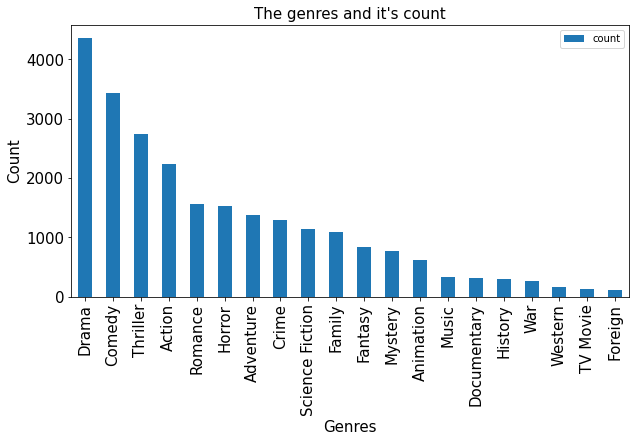

In [114]:

#use my_plot_func 

my_plot_func(df_genres_v1 ,'genres', 'count', "The Genres and it's count"  , 15 , (10 , 5))


### The Most Populare Genre is Drama and it's count 4365


## Research Question 2  (What are the properties are associated with movies that have high revenues?)


### Filter Revenue column to avoid values less than or equal zero


In [115]:
df3 = df.query('revenue > 0 ')



### Find the maximum revenue  of movies from year to year 


In [116]:
df3_max_grouped_Revenue = df3.groupby('release_year').revenue.max()
df3_max_grouped_Revenue



release_year
1960     442378047
1961    1574814739
1962     504591421
1963     561773358
1964     878080399
1965    1129534861
1966     226643572
1967    1345551058
1968     355546597
1969     608151066
1970     766072642
1971     624682610
1972    1277913732
1973     794516768
1974     528462924
1975    1907005841
1976     616903382
1977    1092964988
1978    1003538977
1979     631857706
1980    1424626187
1981     935116878
1982    1791694309
1983    1253818981
1984     698980999
1985     772572771
1986     709881085
1987     614385336
1988     654259434
1989     834061065
1990     842793762
1991     832568277
1992     783306265
1993    1388863311
1994    1159591590
1995    1583049536
1996    1135764351
1997     800663660
1998     740815170
1999    1209980530
2000     691886948
2001    1202518036
2002    1122902454
2003    1326278010
2004    1061903622
2005    1000352539
2006    1152691351
2007    1010653507
2008    1014733032
2009     949276533
2010    1063171911
2011    1287183997

### make a visualization of top Revenue from year to year


#### Use my_plot_func Function to Plot

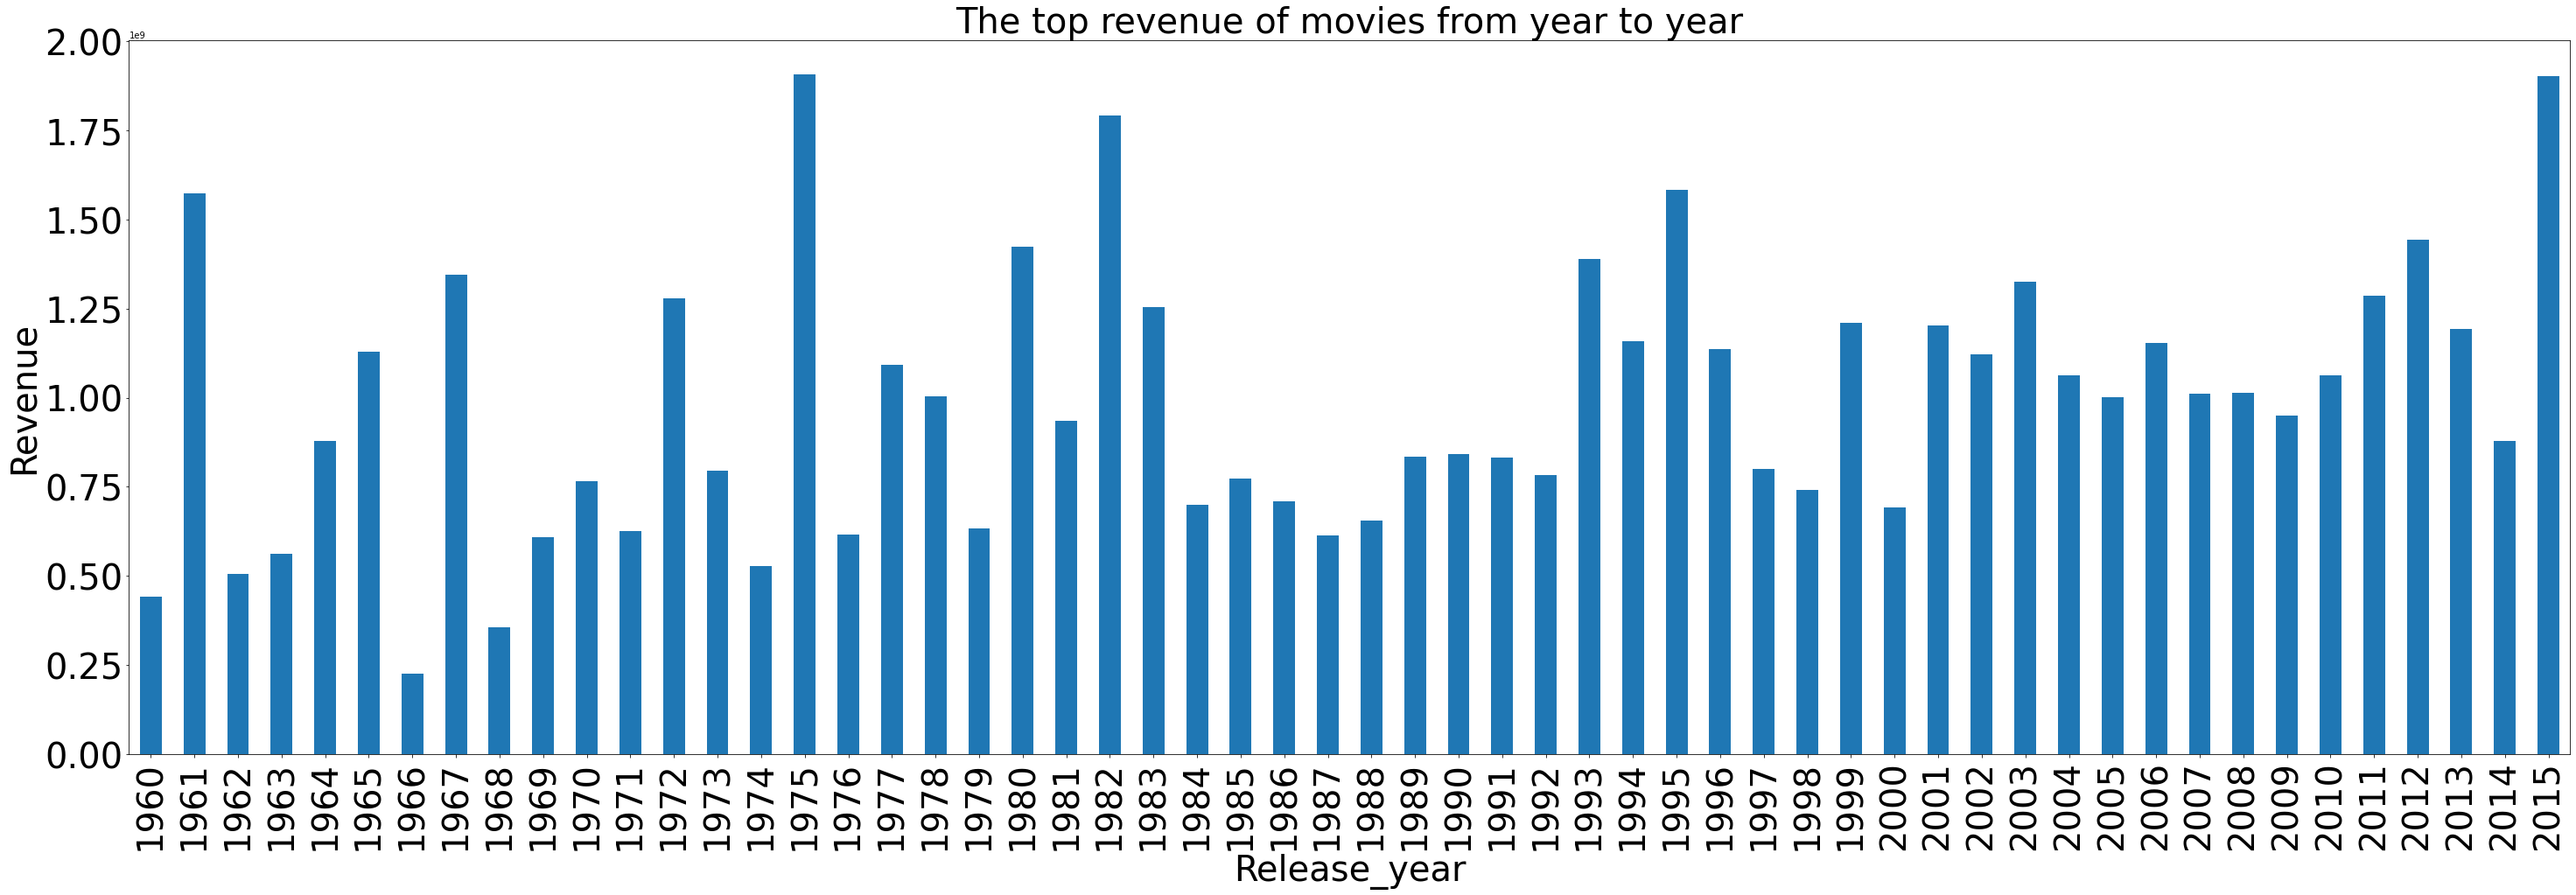

In [118]:
#use my_plot_func

my_plot_func(df3_max_grouped_Revenue ,'release_year','revenue', "The Top Revenue of Movies from Year to Year" , 40 , (50 , 15))


In [119]:
df3.head()

,id,imdb_id,original_title,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
0,135397,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,33.0
1,76341,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,29.0
2,262500,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,14.0
3,140607,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129,12.0
4,168259,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801,10.0


### Filter Columns to select the columns we use in analysis 

In [120]:

df3_filter = df3.filter(items = ['cast' , 'director' , 'runtime' , 'genres' , 'production_companies' , 'vote_count' , 'rate' ,
                            'release_year' , 'budget' , 'revenue' , 'num_popularity'])


### check for new updates

In [121]:
df3_filter.head()

,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,33.0
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,29.0
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,14.0
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129,12.0
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801,10.0


### Find Data of The Maximum Revenue in each year  

In [122]:
df_max_revenue = df3_filter.sort_values('revenue').drop_duplicates(['release_year'],keep='last')
df_max_revenue


,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
10822,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,Chenault Productions,74,7.5,1966,50385110,226643572,1.0
9719,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,1708,7.7,1968,75227563,355546597,4.0
10143,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,197,Action|Drama|History,Bryna Productions,211,6.9,1960,88475609,442378047,2.0
9850,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,216,Adventure|Drama|History|War,Horizon Pictures (II),517,7.5,1962,108126733,504591421,2.0
9767,Cleavon Little|Gene Wilder|Harvey Korman|Slim ...,Mel Brooks,93,Comedy|Western,Crossbow Productions,334,7.0,1974,11497938,528462924,1.0
10438,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,458,6.7,1963,17800448,561773358,3.0
10725,Paul Newman|Robert Redford|Katharine Ross|Stro...,George Roy Hill,110,History|Drama|Western|Crime,Twentieth Century Fox Film Corporation|Campani...,379,7.0,1969,35665585,608151066,2.0
9613,Michael Douglas|Glenn Close|Anne Archer|Ellen ...,Adrian Lyne,119,Horror|Drama|Romance|Thriller,Paramount Pictures,131,6.4,1987,26867126,614385336,1.0
10208,Barbra Streisand|Kris Kristofferson|Gary Busey...,Frank Pierson,139,Drama|Music|Romance,Barwood Films|Warner Bros.,14,5.7,1976,22990188,616903382,1.0
9925,Sean Connery|Jill St. John|Charles Gray|Lana W...,Guy Hamilton,120,Adventure|Action|Thriller|Science Fiction,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,331,6.2,1971,38773403,624682610,2.0


### Filter and Select The Budget and Revenue columns from dataframe

In [123]:
df3_filter_v2 = df3.filter(items = ['budget' , 'revenue' , 'release_year'])

### Find the Data Of maximum and minimum Revenue in one dateframe


In [124]:
max_min_revenue = df3_filter_v2.query('revenue == 1907005841 or (revenue == 2 and release_year == 1995)')
max_min_revenue

,budget,revenue,release_year
8142,8585801,2,1995
9806,28362748,1907005841,1975


### Create a function to plot barth

In [125]:
def plot_barh(data_frame , x_value , y_value , title1 , title2):
    df_plot = pd.DataFrame( {title1 : data_frame[x_value]  , title2 : data_frame[y_value]} )
    res = df_plot.plot.barh(x = title1 , y = title2)


### plot the Budget of maximum and minimum revenue


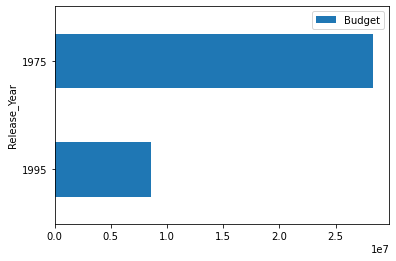

In [126]:
# define data_frame variable
data_frame = max_min_revenue
#pass dataframe , x&y value 
plot_barh( data_frame , 'release_year' , 'budget' , 'Release_Year' , 'Budget')


### The top five of the movies that have the maximum revenue in it's year 


In [127]:
top_5_df = df_max_revenue.tail(5)
top_5_df

,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
10110,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,913,6.6,1961,29179444,1574814739,3.0
8094,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,201,5.6,1995,31481271,1583049536,2.0
8889,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1830,7.2,1982,23726245,1791694309,3.0
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129,12.0
9806,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.3,1975,28362748,1907005841,3.0


### Create a Function to print the cast of movie

In [129]:
#define function to print cast 
#takes a dataframe 
def print_cast(dataframe):
    #make a list of cast
    cast = list(dataframe['cast'])
    print('Cast:')
    for i in cast:
        print(i)
        print(" ")
    

### Create a Function to print production companies


In [130]:
#define a fucntion to print productioncompanies
#takes dataframe 
def print_production_companies(dataframe):
    #make a list of production_companies
    production_companies = list(dataframe['production_companies'])
    print('Production Companies:')
    for i in production_companies:
        print(i)
        print(" ")

### print the cast of top five movies that have the maximum revenue in it's year 

In [131]:
#use print_cast function & pass dataframe to it
print_cast(top_5_df)

Cast:
Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Martha Wentworth|Ben Wright
 
Sandra Bullock|Jeremy Northam|Dennis Miller|Wendy Gazelle|Ken Howard
 
Henry Thomas|Drew Barrymore|Robert MacNaughton|Dee Wallace|Peter Coyote
 
Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley
 
Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorraine Gary|Murray Hamilton
 


### print the production companies of top five movies that have the maximum revenue in it's year 

In [132]:
#print_production_companies function & pass dataframe to it
print_production_companies(top_5_df)

Production Companies:
Walt Disney Productions
 
Columbia Pictures
 
Universal Pictures|Amblin Entertainment
 
Lucasfilm|Truenorth Productions|Bad Robot
 
Universal Pictures|Zanuck/Brown Productions
 


### print Maximum and Minimum Revenue 

In [133]:
#find max revenue  
print('min revenue is '+str(min(df3_filter['revenue'])))

#find min revenue 
print('max revenue is '+str(max(df3_filter['revenue'])))



min revenue is 2
max revenue is 1907005841


### Find Data of Minimum Revenue

In [134]:
#filter data by query method to find minimum revenue
mimimum_revenue = df3_filter.query('revenue == 2') 
#print results 
mimimum_revenue

,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
5067,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,46,6.4,2003,7112115,2,1.0
8142,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,201,6.8,1995,8585801,2,1.0



### Select the maximum budget of these two movies which have the minimum budeget


In [135]:
#filter data by query method to find the minimum revenue 
mimimum_revenue_df = df3_filter.query('revenue == 2 and release_year == 1995') 
#print results 
mimimum_revenue_df


,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
8142,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,201,6.8,1995,8585801,2,1.0


### Find Data of Maximum Revenue

In [136]:
#use query to filter data 
maximum_revenue_df = df3_filter.query('revenue == 1907005841') 
maximum_revenue_df


,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
9806,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.3,1975,28362748,1907005841,3.0


### Find Data of Minimum Revenue


In [137]:
##use query to filter data 
mimimum_revenue_df = df3_filter.query('revenue == 2 and release_year == 1995') 
mimimum_revenue_df


,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
8142,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,201,6.8,1995,8585801,2,1.0


### Find The Maximum Rate

In [138]:
#print max rate 
print(max(df3_filter['rate']))


8.4


### Find Data of Maximum Rate 

In [139]:
#use query to filter data to find max rate
max_Rate_Data = df3_filter.query('rate == 8.4 and num_popularity == 8')
max_Rate_Data

,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
4178,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,36777789,41693462,8.0


### Find The Minimum Rate

In [140]:
#print min rate
print(min(df3_filter['rate']))


2.1


### Find Data of Minimum Rate

In [141]:
#use query to filter data to find min rate
min_Rate_Data = df3_filter.query('rate == 2.1')
min_Rate_Data

,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
7220,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...,Bob Clark,88,Family|Comedy,Crystal Sky Worldwide|Triumph Films,11,2.1,2004,0,10516214,1.0


### Find The Maximum Number of Popularity 


In [142]:
#print max num popularity 
print(max(df3_filter['num_popularity']))


33.0


### Data of Maximum Popularity

In [143]:
#use query to filter data to find max num popularity
max_popularity_Data = df3_filter.query('num_popularity == 33')
max_popularity_Data

,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,33.0


### Find The Minimum Number of Popularity 

In [144]:
#print min num popularity
print(min(df3_filter['num_popularity']))


1.0


### Data of Minimum Number of popularity

In [145]:
#use query method to find min num popularity
min_popularity_Data = df3_filter.query('num_popularity == 1')
min_popularity_Data.head()


,cast,director,runtime,genres,production_companies,vote_count,rate,release_year,budget,revenue,num_popularity
157,Meryl Streep|Kevin Kline|Mamie Gummer|Sebastia...,Jonathan Demme,100,Comedy|Drama|Music,Columbia TriStar|Clinica Estetico|LStar Capital,152,5.5,2015,16559992,38019285,1.0
160,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,100,Drama|Thriller,Screen Gems,122,5.6,2015,11039995,55451294,1.0
161,Tilda Swinton|Matthias Schoenaerts|Ralph Fienn...,Luca Guadagnino,120,Crime|Drama|Mystery|Thriller,StudioCanal|Ministero per i Beni e le AttivitÃ...,69,5.8,2015,0,1781601,1.0
162,Ben Stiller|Naomi Watts|Adam Driver|Amanda Sey...,Noah Baumbach,97,Drama|Comedy,Scott Rudin Productions|A24,265,5.9,2015,9199995,6980483,1.0
163,Will Ferrell|Kevin Hart|Alison Brie|Craig T. N...,Etan Cohen,100,Comedy,Gary Sanchez Productions|Warner Bros.,661,5.9,2015,36799983,97990493,1.0


<a id='conclusions'></a>
# Conclusions




> **Results**: 
1) The Most Populare Genre is Drama and it's count 4365.

2) Movie which have the maximum revenue does not have the maximum number of popularity.

3) Movie which have the maximum revenue does not have the maximum Rate.

4) there is 3160 movie has the lowest number of popularity.






## limitations 

> 1) I could not find any correlation between 'popularity' and 'release year' .It would be good to know more about what is behind the value 'popularity' and what means here. How was it calculated? it could be calculated based on ticket sales?

>2)I made my analyzation based on the values of revenue and found some revenue with negative value.Does this value calculated by mistake? It would be good to know How was it calculated?
    

# Resources

https://pandas.pydata.org/docs/index.html

https://stackoverflow.com/

https://www.datasciencemadesimple.com/ceil-floor-dataframe-pandas-python-2/

https://www.kite.com/python/answers/how-to-get-the-maximum-values-of-each-group-in-a-pandas-dataframe-in-python

https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby